<a href="https://colab.research.google.com/github/WinstonLai/cudo/blob/master/CUDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab Notebooks/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# <font color=black>【Delivery Orders】Data Preparation</font>
***

## <font color=blue>【Delivery Orders】User Defined Functions</font>

In [0]:
# convert date time format
def convert_to_HHMM(df, column_name):
    df[column_name].replace({0: np.NaN}, inplace=True)
    df[column_name] = df[column_name].apply(lambda x: pd.to_datetime(x, format='%H%M'))
    df[column_name] = pd.to_datetime(df[column_name], format='%H:%M').dt.time
    return df[column_name]

## <font color=green>【Delivery Orders】Data Wrangling</font>

### <font color=green>【Delivery Orders】Jan</font>

In [0]:
# count number of files in the folder
num_order_files_Jan = sum([len(files) for r, d, files in os.walk(root_path+'Merged_Data/Delivery_Orders/Orders_Jan')])

# concatenate all delivery orders into one data frame
orders_frames_Jan = []
for i in range(num_order_files_Jan):
    df_order_Jan = pd.read_excel(open(root_path+'Merged_Data/Delivery_Orders/Orders_Jan/Jan19_Delivery_Orders ({}).xlsx'.format(i+1), 'rb'), 
                                 sheet_name=2, sort=True, 
                                 converters={'Postal Code': lambda x: str(x), 
                                             'DO Ref': lambda x: str(x),
                                            }
                                )
    # fill down service time value
    df_order_Jan['Service Time (Mins)'].fillna(method='ffill', inplace=True)
    orders_frames_Jan.append(df_order_Jan)
df_orders_Jan = pd.concat(orders_frames_Jan, sort=False)

# drop all rows where cell 'Delivery Date' is null
df_orders_Jan = df_orders_Jan[pd.notnull(df_orders_Jan['Delivery Date'])]

# drop empty columns
df_orders_Jan.dropna(how='all', axis=1, inplace=True)

# drop unnamed column
df_orders_Jan = df_orders_Jan.drop(['Unnamed: 2'], axis=1)

# add leading zero to postal code
df_orders_Jan['Postal Code'] = df_orders_Jan['Postal Code'].apply(lambda x: '{0:0>6}'.format(x))

# convert date time
convert_to_HHMM(df_orders_Jan, 'Earliest delivery time ')
convert_to_HHMM(df_orders_Jan, 'Latest delivery time ')
df_orders_Jan['Delivery Date'] = df_orders_Jan['Delivery Date'].apply(lambda x: pd.to_datetime(x)).dt.date

# rename column 'DO Ref'
df_orders_Jan = df_orders_Jan.rename(columns={'DO Ref': 'DO reference'})

### <font color=green>【Delivery Orders】Feb</font>

In [0]:
# count number of files in the folder
num_order_files_Feb = sum([len(files) for r, d, files in os.walk(root_path+'Merged_Data/Delivery_Orders/Orders_Feb')])

# concatenate all delivery orders into one data frame
orders_frames_Feb = []
for i in range(num_order_files_Feb):
    df_order_Feb = pd.read_excel(open(root_path+'Merged_Data/Delivery_Orders/Orders_Feb/Feb19_Delivery_Orders ({}).xlsx'.format(i+1), 'rb'), 
                                 sheet_name=2, sort=True, 
                                 converters={'Postal Code': lambda x: str(x), 
                                             'DO Ref': lambda x: str(x),
                                            }
                                )
    # fill down service time value
    df_order_Feb['Service Time (Mins)'].fillna(method='ffill', inplace=True)
    orders_frames_Feb.append(df_order_Feb)
df_orders_Feb = pd.concat(orders_frames_Feb, sort=False)

# drop all rows where cell 'Delivery Date' is null
df_orders_Feb = df_orders_Feb[pd.notnull(df_orders_Feb['Delivery Date'])]

# drop empty columns
df_orders_Feb.dropna(how='all', axis=1, inplace=True)

# drop unnamed column
df_orders_Feb = df_orders_Feb.drop(['Unnamed: 2'], axis=1)

# add leading zero to postal code
df_orders_Feb['Postal Code'] = df_orders_Feb['Postal Code'].apply(lambda x: '{0:0>6}'.format(x))

# convert date time
convert_to_HHMM(df_orders_Feb, 'Earliest delivery time ')
convert_to_HHMM(df_orders_Feb, 'Latest delivery time ')
df_orders_Feb['Delivery Date'] = df_orders_Feb['Delivery Date'].apply(lambda x: pd.to_datetime(x)).dt.date

# rename column 'DO Ref'
df_orders_Feb = df_orders_Feb.rename(columns={'DO Ref': 'DO reference'})

### <font color=green>【Delivery Orders】Mar</font>

In [0]:
# count number of files in the folder
num_order_files_Mar = sum([len(files) for r, d, files in os.walk(root_path+'Merged_Data/Delivery_Orders/Orders_Mar')])

# concatenate all delivery orders into one data frame
orders_frames_Mar = []
for i in range(num_order_files_Mar):
    df_order_Mar = pd.read_excel(open(root_path+'/Merged_Data/Delivery_Orders/Orders_Mar/Mar19_Delivery_Orders ({}).xlsx'.format(i+1), 'rb'), 
                                 sheet_name='Orders', sort=True, 
                                 converters={'Postal Code': lambda x: str(x), 
                                             'Delivery Location Postal Code': lambda x: str(x), 
                                             'DO Ref': lambda x: str(x)
                                            }
                                )
    # drop unwanted columns
    if 'Pickup Location Postal Code' and 'Pickup Location Address' and 'Earliest Pickup Time' and 'Latest Pickup Time' in df_order_Mar.columns:
        df_order_Mar = df_order_Mar.drop(['Pickup Location Postal Code', 'Pickup Location Address',
                                          'Earliest Pickup Time', 'Latest Pickup Time'
                                         ], axis=1)
        
    # rename some columns for consistency
    if 'Delivery Location Postal Code' in df_order_Mar.columns:
        df_order_Mar = df_order_Mar.rename(columns={'Delivery Location Postal Code': 'Postal Code'})  
    if 'Earliest Delivery Time' in df_order_Mar.columns:
        df_order_Mar = df_order_Mar.rename(columns={'Earliest Delivery Time': 'Earliest delivery time '})
    if 'Latest Delivery Time' in df_order_Mar.columns:
        df_order_Mar = df_order_Mar.rename(columns={'Latest Delivery Time': 'Latest delivery time '})
        
    # fill down service time value
    df_order_Mar['Service Time (Mins)'].fillna(method='ffill', inplace=True)
    
    orders_frames_Mar.append(df_order_Mar)
df_orders_Mar = pd.concat(orders_frames_Mar, sort=False)

# drop all rows where cell 'Delivery Date' is null
df_orders_Mar = df_orders_Mar[pd.notnull(df_orders_Mar['Delivery Date'])]

# drop empty columns
df_orders_Mar.dropna(how='all', axis=1, inplace=True)

# add leading zero to postal code
df_orders_Mar['Postal Code'] = df_orders_Mar['Postal Code'].apply(lambda x: '{0:0>6}'.format(x))

# convert date time
convert_to_HHMM(df_orders_Mar, 'Earliest delivery time ')
convert_to_HHMM(df_orders_Mar, 'Latest delivery time ')
df_orders_Mar['Delivery Date'] = df_orders_Mar['Delivery Date'].apply(lambda x: pd.to_datetime(x)).dt.date

# rename column 'DO Ref'
df_orders_Mar = df_orders_Mar.rename(columns={'DO Ref': 'DO reference'})

### <font color=green>【Delivery Orders】Apr</font>

In [0]:
# count number of files in the folder
num_order_files_Apr = sum([len(files) for r, d, files in os.walk(root_path+'/Merged_Data/Delivery_Orders/Orders_Apr')])

# concatenate all delivery orders into one data frame
orders_frames_Apr = []
for i in range(num_order_files_Apr):
    df_order_Apr = pd.read_excel(open(root_path+'Merged_Data/Delivery_Orders/Orders_Apr/Apr19_Delivery_Orders ({}).xlsx'.format(i+1), 'rb'), 
                                 sheet_name='Orders', sort=True, 
                                 converters={'Postal Code': lambda x: str(x),
                                             'Delivery Location Postal Code': lambda x: str(x),
                                             'DO Ref': lambda x: str(x)
                                            }
                                )
    # drop unwanted columns
    if 'Pickup Location Postal Code' and 'Pickup Location Address' and 'Earliest Pickup Time' and 'Latest Pickup Time' in df_order_Apr.columns:
        df_order_Apr = df_order_Apr.drop(['Pickup Location Postal Code', 'Pickup Location Address',
                                          'Earliest Pickup Time', 'Latest Pickup Time'
                                         ], axis=1)
        
    # rename some columns for consistency
    if 'Delivery Location Postal Code' in df_order_Apr.columns:
        df_order_Apr = df_order_Apr.rename(columns={'Delivery Location Postal Code': 'Postal Code'})  
    if 'Earliest Delivery Time' in df_order_Apr.columns:
        df_order_Apr = df_order_Apr.rename(columns={'Earliest Delivery Time': 'Earliest delivery time '})
    if 'Latest Delivery Time' in df_order_Apr.columns:
        df_order_Apr = df_order_Apr.rename(columns={'Latest Delivery Time': 'Latest delivery time '})
        
    # fill down service time value
    df_order_Apr['Service Time (Mins)'].fillna(method='ffill', inplace=True)
    
    orders_frames_Apr.append(df_order_Apr)
df_orders_Apr = pd.concat(orders_frames_Apr, sort=False)

# drop all rows where cell 'Delivery Date' is null
df_orders_Apr = df_orders_Apr[pd.notnull(df_orders_Apr['Delivery Date'])]

# drop empty columns
df_orders_Apr.dropna(how='all', axis=1, inplace=True)

# add leading zero to postal code
df_orders_Apr['Postal Code'] = df_orders_Apr['Postal Code'].apply(lambda x: '{0:0>6}'.format(x))

# convert date time
convert_to_HHMM(df_orders_Apr, 'Earliest delivery time ')
convert_to_HHMM(df_orders_Apr, 'Latest delivery time ')
df_orders_Apr['Delivery Date'] = df_orders_Apr['Delivery Date'].apply(lambda x: pd.to_datetime(x, dayfirst=True)).dt.date

# rename column 'DO Ref'
df_orders_Apr = df_orders_Apr.rename(columns={'DO Ref': 'DO reference'})

### <font color=green>【Delivery Orders】Consolidation</font>

In [0]:
orders_frames = [df_orders_Jan, df_orders_Feb, df_orders_Mar, df_orders_Apr]
df_orders = pd.concat(orders_frames, sort=False)

# update name 'CFS' to 'CKL'
df_orders.replace({'CFS': 'CKL'}, inplace=True)

# remove white space of postal code
df_orders['Postal Code'].str.strip()

# export the concatenated file as csv file
df_orders.to_csv(root_path+'/Merged_Data/MergedDeliveryOrders.csv', index=False)

# <font color=black>【Engine Plans】Data Preparation</font>
***

## <font color=green>【Engine Plans】Data Wrangling</font>

### <font color=green>【Engine Plans】Jan</font>

In [0]:
# read all sheets in the consolidated Excel file and load into a single data frame
df_plans_Jan_raw = pd.read_excel(root_path+'Merged_Data/Engine_Plans/Plans_Jan/LiveTrial_Overview_Jan2019.xlsx', 
                                 sheet_name=None, ignore_index=True,
                                 converters={'postal Code': lambda x: str(x),
                                             'DO reference': lambda x: str(x),
                                             'Delivery Seq. No': lambda x: str(x),
                                             'Trip ID': lambda x: str(x),
                                             'Arrival Time': lambda x: str(x),
                                             'Time From': lambda x: str(x),
                                             'Time To': lambda x: str(x)
                                            }
                                )
df_plans_Jan = pd.concat(df_plans_Jan_raw.values(), sort=False)

# drop all rows where cell 'Vehicle ID' is null
df_plans_Jan = df_plans_Jan[pd.notnull(df_plans_Jan['Vehicle ID'])]

# add leading zero to postal code
df_plans_Jan['postal Code'] = df_plans_Jan['postal Code'].apply(lambda x: '{0:0>6}'.format(x))

# replace all "'-", "-" with NaN
df_plans_Jan.replace({"'-": np.NaN,
                      "-": np.NaN
                     }, inplace=True)

# convert date time format
df_plans_Jan['Delivery Date'] = df_plans_Jan['Delivery Date'].apply(lambda x: pd.to_datetime(x, infer_datetime_format=True, errors='ignore'))
df_plans_Jan['Delivery Date'] = pd.to_datetime(df_plans_Jan['Delivery Date'], format='%Y%M%D').dt.date

df_plans_Jan['Arrival Time'] = pd.to_datetime(df_plans_Jan['Arrival Time']).dt.strftime('%H:%M:%S')
df_plans_Jan['Time From'] = pd.to_datetime(df_plans_Jan['Time From']).dt.strftime('%H:%M:%S')
df_plans_Jan['Time To'] = pd.to_datetime(df_plans_Jan['Time To']).dt.strftime('%H:%M:%S')

# convert column 'Quantity' to integers
df_plans_Jan['Quantity'] = pd.to_numeric(df_plans_Jan['Quantity'], errors='coerce').fillna(0).astype(np.int64)

# replace vehicle ID with values without white space
df_plans_Jan['Vehicle ID'].replace({'YP 7655 J': 'YP7655J',
                                    'YP 7655J T': 'YP7655J',
                                    'YN 4635 Y': 'YN4635Y',
                                    'YN 4635 Y - T': 'YN4635Y',
                                    'YP   592 C': 'YP592C',
                                    'YP 592 C - T': 'YP592C',
                                    'YP 3776 U': 'YP3776U',
                                    'YP 3776 U - T': 'YP3776U'
                                   }, inplace=True)

# replace all 'NaT' with NaN
df_plans_Jan['Time From'].replace({'NaT': np.NaN}, inplace=True)
df_plans_Jan['Time To'].replace({'NaT': np.NaN}, inplace=True)

# create a new column "On Time" and see if the delivery plan is on time for each order row by row
df_plans_Jan.insert(loc=14, column='On Time', 
                    value=np.where((df_plans_Jan['Arrival Time'] >= df_plans_Jan['Time From']) & 
                                   (df_plans_Jan['Arrival Time'] <= df_plans_Jan['Time To']), 
                                   'True', 'False'))

df_plans_Jan['On Time'] = np.where(df_plans_Jan['Time To'].isna(), np.NaN, df_plans_Jan['On Time'])

# create a new column "Engine Time" and compute the travel time
df_plans_Jan['Engine Time'] = df_plans_Jan.iloc[:, -4:-1].sum(axis=1)

# rename columns
df_plans_Jan.rename(columns={'Address': 'Delivery Location Address',
                             'postal Code': 'Postal Code',
                             'Location': 'Delivery Location'
                            }, inplace=True)

### <font color=green>【Engine Plans】Feb</font>

In [0]:
# count number of files in the folder
num_plan_files_Feb = sum([len(files) for r, d, files in os.walk(root_path+'Merged_Data/Engine_Plans/Plans_Feb')])

# concatenate all delivery orders into one data frame
plans_frames_Feb = []
for i in range(num_plan_files_Feb):
    df_plan_Feb = pd.read_csv(open(root_path+'Merged_Data/Engine_Plans/Plans_Feb/Feb19_Engine_Plan ({}).csv'.format(i+1), 'rb'),
                            converters={'Postal Code': lambda x: str(x),
                                        'DO reference': lambda x: str(x),
                                        'Delivery Seq. No': lambda x: str(x),
                                        'Trip ID': lambda x: str(x),
                                       }
                             )
    
    # fill NaN of column 'Delivery Date' with date value
    date_value_Feb = df_plan_Feb.at[3, 'Delivery Date']
    df_plan_Feb['Delivery Date'].fillna(date_value_Feb, inplace=True)
    
    plans_frames_Feb.append(df_plan_Feb)
df_plans_Feb = pd.concat(plans_frames_Feb, sort=False)

# drop all rows where cell 'Vehicle ID' is null
df_plans_Feb = df_plans_Feb[pd.notnull(df_plans_Feb['Vehicle ID'])]

# add leading zero to postal code
df_plans_Feb['Postal Code'] = df_plans_Feb['Postal Code'].apply(lambda x: '{0:0>6}'.format(x))

# replace all "'-" with NaN
df_plans_Feb.replace({"'-": np.NaN}, inplace=True)

# convert date time format
df_plans_Feb['Delivery Date'] = df_plans_Feb['Delivery Date'].apply(lambda x: pd.to_datetime(x, format='%d/%m/%Y'))
df_plans_Feb['Delivery Date'] = pd.to_datetime(df_plans_Feb['Delivery Date'], format='%Y%M%D').dt.date

df_plans_Feb['Arrival Time'] = pd.to_datetime(df_plans_Feb['Arrival Time']).dt.strftime('%H:%M:%S')
df_plans_Feb['Time From'] = pd.to_datetime(df_plans_Feb['Time From']).dt.strftime('%H:%M:%S')
df_plans_Feb['Time To'] = pd.to_datetime(df_plans_Feb['Time To']).dt.strftime('%H:%M:%S')

# convert column 'Quantity' to integers
df_plans_Feb['Quantity'] = pd.to_numeric(df_plans_Feb['Quantity'], errors='coerce').fillna(0).astype(np.int64)

# replace vehicle ID with values without white space
df_plans_Feb['Vehicle ID'].replace({'YP 7655 J': 'YP7655J',
                                    'YP 7655J T': 'YP7655J',
                                    'YN 4635 Y': 'YN4635Y',
                                    'YN 4635 Y - T': 'YN4635Y',
                                    'YP   592 C': 'YP592C',
                                    'YP 592 C - T': 'YP592C',
                                    'YP 3776 U': 'YP3776U',
                                    'YP 3776 U - T': 'YP3776U'
                                   }, inplace=True)

# replace all 'NaT' with NaN
df_plans_Feb['Time From'].replace({'NaT': np.NaN}, inplace=True)
df_plans_Feb['Time To'].replace({'NaT': np.NaN}, inplace=True)

# create a new column "On Time" and see if the delivery plan is on time for each order row by row
df_plans_Feb.insert(loc=14, column='On Time', 
                    value=np.where((df_plans_Feb['Arrival Time'] >= df_plans_Feb['Time From']) & 
                                   (df_plans_Feb['Arrival Time'] <= df_plans_Feb['Time To']), 
                                   'True', 'False'))

df_plans_Feb['On Time'] = np.where(df_plans_Feb['Time To'].isna(), np.NaN, df_plans_Feb['On Time'])

# create a new column "Total Travel Time" and compute the travel time
df_plans_Feb['Engine Time'] = df_plans_Feb.iloc[:, -4:-1].sum(axis=1)

# rename columns
df_plans_Feb.rename(columns={'Address': 'Delivery Location Address',
                             'Location': 'Delivery Location'
                            }, inplace=True)

### <font color=green>【Engine Plans】Mar</font>

In [0]:
# count number of files in the folder
num_plan_files_Mar = sum([len(files) for r, d, files in os.walk(root_path+'Merged_Data/Engine_Plans/Plans_Mar')])

# concatenate all delivery orders into one data frame
plans_frames_Mar = []
for i in range(num_plan_files_Mar):
    df_plan_Mar = pd.read_csv(open(root_path+'Merged_Data/Engine_Plans/Plans_Mar/Mar19_Engine_Plan ({}).csv'.format(i+1), 'rb'),
                            converters={'Postal Code': lambda x: str(x),
                                        'DO reference': lambda x: str(x),
                                        'Delivery Seq. No': lambda x: str(x),
                                        'Trip ID': lambda x: str(x),
                                       }
                             )
    
    # fill NaN of column 'Delivery Date' with date value
    date_value_Mar = df_plan_Mar.at[3, 'Delivery Date']
    df_plan_Mar['Delivery Date'].fillna(date_value_Mar, inplace=True)
    
    plans_frames_Mar.append(df_plan_Mar)
df_plans_Mar = pd.concat(plans_frames_Mar, sort=False)

# rename some columns for consistency
df_plans_Mar.rename(columns={'Delivery Time From': 'Time From',
                             'Delivery Time To': 'Time To',
                             'Address': 'Delivery Location Address'
                            }, inplace=True)

# drop unwanted columns
df_plans_Mar.drop(['Pickup Location', 'Pickup Time From', 'Pickup Time To', 'Booking Ref'], axis=1, inplace=True)

# drop all rows where cell 'Vehicle ID' is null
df_plans_Mar = df_plans_Mar[pd.notnull(df_plans_Mar['Vehicle ID'])]

# add leading zero to postal code
df_plans_Mar['Postal Code'] = df_plans_Mar['Postal Code'].apply(lambda x: '{0:0>6}'.format(x))

# replace all "'-" with NaN
df_plans_Mar.replace({"'-": np.NaN}, inplace=True)

# convert date time format
df_plans_Mar['Delivery Date'] = df_plans_Mar['Delivery Date'].apply(lambda x: pd.to_datetime(x, infer_datetime_format=True))
df_plans_Mar['Delivery Date'] = pd.to_datetime(df_plans_Mar['Delivery Date'], format='%Y%M%D').dt.date

df_plans_Mar['Arrival Time'] = pd.to_datetime(df_plans_Mar['Arrival Time']).dt.strftime('%H:%M:%S')
df_plans_Mar['Time From'] = pd.to_datetime(df_plans_Mar['Time From']).dt.strftime('%H:%M:%S')
df_plans_Mar['Time To'] = pd.to_datetime(df_plans_Mar['Time To']).dt.strftime('%H:%M:%S')

# convert column 'Quantity' to integers
df_plans_Mar['Quantity'] = pd.to_numeric(df_plans_Mar['Quantity'], errors='coerce').fillna(0).astype(np.int64)

# replace vehicle ID with values without white space
df_plans_Mar['Vehicle ID'].replace({'YP 7655 J': 'YP7655J',
                                    'YP 7655J T': 'YP7655J',
                                    'YN 4635 Y': 'YN4635Y',
                                    'YN 4635 Y - T': 'YN4635Y',
                                    'YP   592 C': 'YP592C',
                                    'YP 592 C - T': 'YP592C',
                                    'YP 3776 U': 'YP3776U',
                                    'YP 3776 U - T': 'YP3776U'
                                   }, inplace=True)

# replace all 'NaT' with NaN
df_plans_Mar['Time From'].replace({'NaT': np.NaN}, inplace=True)
df_plans_Mar['Time To'].replace({'NaT': np.NaN}, inplace=True)

# create a new column "On Time" and see if the delivery plan is on time for each order row by row
df_plans_Mar.insert(loc=14, column='On Time', 
                    value=np.where((df_plans_Mar['Arrival Time'] >= df_plans_Mar['Time From']) & 
                                   (df_plans_Mar['Arrival Time'] <= df_plans_Mar['Time To']), 
                                   'True', 'False'))

df_plans_Mar['On Time'] = np.where(df_plans_Mar['Time To'].isna(), np.NaN, df_plans_Mar['On Time'])

# create a new column "Total Travel Time" and compute the travel time
df_plans_Mar['Engine Time'] = df_plans_Mar.iloc[:, -4:-1].sum(axis=1)

### <font color=green>【Engine Plans】Apr</font>

In [0]:
# count number of files in the folder
num_plan_files_Apr = sum([len(files) for r, d, files in os.walk(root_path+'Merged_Data/Engine_Plans/Plans_Apr')])

# concatenate all delivery orders into one data frame
plans_frames_Apr = []
for i in range(num_plan_files_Apr):
    df_plan_Apr = pd.read_excel(open(root_path+'Merged_Data/Engine_Plans/Plans_Apr/Apr19_Engine_Plan ({}).xlsx'.format(i+1), 'rb'),
                                sheet_name=0, sort=True,
                                converters={'Postal Code': lambda x: str(x),
                                            'DO reference': lambda x: str(x),
                                            'Delivery Seq. No': lambda x: str(x),
                                            'Trip ID': lambda x: str(x),
                                           }
                                )
    
    # fill NaN of column 'Delivery Date' with date value
    date_value_Apr = df_plan_Apr.at[3, 'Delivery Date']
    df_plan_Apr['Delivery Date'].fillna(date_value_Apr, inplace=True)
    
    plans_frames_Apr.append(df_plan_Apr)
df_plans_Apr = pd.concat(plans_frames_Apr, sort=False)

# rename some columns for consistency
df_plans_Apr.rename(columns={'Address': 'Delivery Location Address',
                             'Location': 'Delivery Location'}, inplace=True)

# drop unwanted columns
df_plans_Apr.drop(['Pickup Location', 'Pickup Location Postal Code'], axis=1, inplace=True)

# drop all rows where cell 'Vehicle ID' is null
df_plans_Apr = df_plans_Apr[pd.notnull(df_plans_Apr['Vehicle ID'])]

# add leading zero to postal code
df_plans_Apr['Postal Code'] = df_plans_Apr['Postal Code'].apply(lambda x: '{0:0>6}'.format(x))

# replace all "'-" with NaN
df_plans_Apr.replace({"'-": np.NaN}, inplace=True)

# convert date time format
df_plans_Apr['Delivery Date'] = df_plans_Apr['Delivery Date'].apply(lambda x: pd.to_datetime(x, dayfirst=True))
df_plans_Apr['Delivery Date'] = pd.to_datetime(df_plans_Apr['Delivery Date'], format='%Y%M%D').dt.date

df_plans_Apr['Arrival Time'] = pd.to_datetime(df_plans_Apr['Arrival Time']).dt.strftime('%H:%M:%S')
df_plans_Apr['Time From'] = pd.to_datetime(df_plans_Apr['Time From']).dt.strftime('%H:%M:%S')
df_plans_Apr['Time To'] = pd.to_datetime(df_plans_Apr['Time To']).dt.strftime('%H:%M:%S')

# convert column 'Quantity' to integers
df_plans_Apr['Quantity'] = pd.to_numeric(df_plans_Apr['Quantity'], errors='coerce').fillna(0).astype(np.int64)

# replace vehicle ID with values without white space
df_plans_Apr['Vehicle ID'].replace({'YP 7655 J': 'YP7655J',
                                    'YP 7655J T': 'YP7655J',
                                    'YN 7131 P': 'YN7131P',
                                    'YN 7279 Y': 'YN7279Y',
                                    'YP   592 C': 'YP592C',
                                    'YN 4408 L': 'YN4408L',
                                    'YP 3776 U': 'YP3776U'
                                   }, inplace=True)

# replace all 'NaT' with NaN
df_plans_Apr['Time From'].replace({'NaT': np.NaN}, inplace=True)
df_plans_Apr['Time To'].replace({'NaT': np.NaN}, inplace=True)

# create a new column "On Time" and see if the delivery plan is on time for each order row by row
df_plans_Apr.insert(loc=14, column='On Time', 
                    value=np.where((df_plans_Apr['Arrival Time'] >= df_plans_Apr['Time From']) & 
                                   (df_plans_Apr['Arrival Time'] <= df_plans_Apr['Time To']), 
                                   'True', 'False'))

df_plans_Apr['On Time'] = np.where(df_plans_Apr['Time To'].isna(), np.NaN, df_plans_Apr['On Time'])

# create a new column "Total Travel Time" and compute the travel time
df_plans_Apr['Engine Time'] = df_plans_Apr.iloc[:, -4:-1].sum(axis=1)

### <font color=green>【Engine Plans】Consolidation</font>

In [0]:
plans_frames = [df_plans_Jan, df_plans_Feb, df_plans_Mar, df_plans_Apr]
df_plans = pd.concat(plans_frames, sort=False)

# update name 'CFS' to 'CKL'
df_plans.replace({'CFS': 'CKL'}, inplace=True)

# remove white space of postal code
df_plans['Postal Code'].str.strip()

# export the concatenated file as csv file
df_plans.to_csv(root_path+'Merged_Data/MergedEnginePlans.csv', index=False)

### <font color=green>【Engine Plans】Lookup Distance Matrix</font>

In [0]:
# read distance matrix
df_distance_matrix = pd.read_excel(open(root_path+'Merged_Data/Distance_Matrix.xlsx', 'rb'))
df_distance_matrix.set_index('Row Labels', inplace=True)

# create a new column "Engine Distance" and lookup distance value to fill the column
df_plans.insert(loc=20, column='Engine Distance', value=np.NaN)

plans_row_count = df_plans.shape[0]
location_list = df_distance_matrix.columns.values.tolist()
for i in range(plans_row_count):
    if i == 0:
        df_plans.iloc[i, 20] = np.NaN
    else:
        start_location = df_plans.iloc[i-1, 4]
        end_location = df_plans.iloc[i, 4]
        
        # remove "," if it is in the last position of the string
        if start_location[-1] == ',':
            start_location = start_location.rstrip(',')
        if end_location[-1] == ',':
            end_location = end_location.rstrip(',')
        
        # lookup distance from the distance matrix based on start_location and end_location
        if (start_location in location_list) and (end_location in location_list):
            df_plans.iloc[i, 20] = df_distance_matrix.lookup([start_location], [end_location])
        else:
            df_plans.iloc[i, 20] = np.NaN

### <font color=green>【Engine Plans】Lookup Lat Long</font>

In [0]:
# read geocoding table
df_geocoding = pd.read_excel(open(root_path+'Merged_Data/Geocoding.xlsx', 'rb'),
                            sheet_name=0, sort=True,
                            converters={'Postal Code': lambda x: str(x)})

df_plans = df_plans.merge(df_geocoding, on='Postal Code', how='left')

# export the concatenated file as csv file
df_plans.to_csv(root_path+'Merged_Data/MergedEnginePlansProcessed.csv', index=False)

### <font color=green>【Engine Plans】Extract Table of Quantity by Vehicle</font>

In [0]:
df_plans_quantity_vehicle = df_plans[['Vehicle ID', 'Delivery Date', 'Quantity']]
df_plans_quantity_vehicle = df_plans_quantity_vehicle.groupby(['Vehicle ID', 'Delivery Date']).sum()
df_plans_quantity_vehicle.sort_values(by=['Delivery Date', 'Vehicle ID'], inplace=True)

### <font color=green>【Engine Plans】Count Trips</font>

In [0]:
df_plans.insert(loc=5, column='Trip Marker', 
                value=np.where((df_plans['Delivery Location'] == 'CKL') & (df_plans['Delivery Seq. No'] != '1'), 
                               1, np.NaN)
               )

df_plans_trip_summary = df_plans.groupby(['Delivery Date', 'Vehicle ID']).sum()['Trip Marker']
df_plans_trip_summary = df_plans_trip_summary.to_frame()

## <font color=magenta>【Engine Plans】Data Analysis</font>

### <font color=magenta>【Engine Plans】Engine Plan Date List</font>

In [128]:
# list down the date with engine plans
date_planned = df_plans['Delivery Date'].apply(lambda x: x.strftime('%Y-%m-%d')).unique().tolist()
date_planned

['2019-01-01',
 '2019-01-02',
 '2019-01-03',
 '2019-01-04',
 '2019-01-05',
 '2019-01-07',
 '2019-01-08',
 '2019-01-10',
 '2019-01-11',
 '2019-01-14',
 '2019-01-15',
 '2019-01-16',
 '2019-01-17',
 '2019-01-19',
 '2019-01-21',
 '2019-01-22',
 '2019-01-23',
 '2019-01-24',
 '2019-01-25',
 '2019-01-26',
 '2019-01-28',
 '2019-01-29',
 '2019-01-30',
 '2019-02-02',
 '2019-02-04',
 '2019-02-05',
 '2019-02-06',
 '2019-02-07',
 '2019-02-08',
 '2019-02-09',
 '2019-02-11',
 '2019-02-12',
 '2019-02-13',
 '2019-02-14',
 '2019-02-15',
 '2019-02-18',
 '2019-02-19',
 '2019-02-20',
 '2019-02-21',
 '2019-02-23',
 '2019-02-25',
 '2019-02-26',
 '2019-02-27',
 '2019-02-28',
 '2019-03-02',
 '2019-03-04',
 '2019-03-06',
 '2019-03-07',
 '2019-03-08',
 '2019-03-09',
 '2019-03-11',
 '2019-03-12',
 '2019-03-13',
 '2019-03-14',
 '2019-03-15',
 '2019-03-16',
 '2019-03-18',
 '2019-03-19',
 '2019-03-20',
 '2019-03-21',
 '2019-03-22',
 '2019-03-23',
 '2019-03-25',
 '2019-03-26',
 '2019-03-27',
 '2019-03-28',
 '2019-03-

# <font color=black>【GPS Data】Data Preparation</font>
***

## <font color=blue>【GPS Data】User Defined Functions</font>

In [0]:
def get_postal_code(x):
    if x.split()[0] == 'Close' and x.split()[1] == 'to':
        return x.split()[2]
    else:
        return np.NaN

## <font color=green>【GPS Data】Data Wrangling</font>

### <font color=green>【GPS Data】Consolidation</font>

In [0]:
# read all Excel files in the folder
GPS_data_path = root_path+'Merged_Data/GPS_Data'
GPS_files = []
for r, d, f in os.walk(GPS_data_path):
    for file in f:
        if '.xls' in file:
            GPS_files.append(os.path.join(r, file))

# concatenate all GPS raw data into one data frame
GPS_frames = []
for f in GPS_files:
    df_raw_GPS = pd.read_excel(open(f, 'rb'))
    vehicle_ID = df_raw_GPS.at[13, 'Unnamed: 6']
    df_raw_GPS = df_raw_GPS[['Unnamed: 1','Unnamed: 2', 'Unnamed: 3', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 8']]
    df_raw_GPS = df_raw_GPS[pd.notnull(df_raw_GPS['Unnamed: 1'])]
    df_raw_GPS = df_raw_GPS.rename(columns={'Unnamed: 1': 'Date',
                                            'Unnamed: 2': 'Long',
                                            'Unnamed: 3': 'Lat',
                                            'Unnamed: 5': 'Locale',
                                            'Unnamed: 7': 'Speed',
                                            'Unnamed: 8': 'Odometer'
                                           }
                                  )
    df_raw_GPS = df_raw_GPS[~df_raw_GPS['Date'].isin(['Travel Summary', 'Driver', 'Type', 'Date', 'Dates'])]
    df_raw_GPS.insert(loc=0, column='Vehicle ID', value=vehicle_ID)
    GPS_frames.append(df_raw_GPS)
df_GPS = pd.concat(GPS_frames, sort=False)

# sort the data frame by "Vehicle ID" and "Date"
df_GPS.sort_values(by=['Vehicle ID', 'Date'], inplace=True)

### <font color=green>【GPS Data】Calculate Columns</font>

In [0]:
# create a seperate date column with date value only
df_GPS['Date Only'] = df_GPS['Date'].apply(lambda x: x.date())

# rename column "Date" to "Date Time"
df_GPS.rename(columns={'Date': 'Date Time'}, inplace=True)

# create a new column 'Travel Distance' and calculate distance travelled row by row
df_GPS['Travel Distance'] = df_GPS.groupby(['Vehicle ID'])['Odometer'].diff()

# remove rows with "Travel Distance" less than 0
df_GPS = df_GPS[df_GPS['Travel Distance'] >= 0]

# create a new column 'Travel Time' and calculate time travelled row by row
df_GPS['Travel Time in Seconds'] = df_GPS.groupby(['Vehicle ID', df_GPS['Date Only']])['Date Time'].diff().astype('timedelta64[s]')

# change column "Lat" & "Long" to float
df_GPS['Lat'] = df_GPS['Lat'].astype(float)
df_GPS['Long'] = df_GPS['Long'].astype(float)

# export the concatenated file as csv file
df_GPS.to_csv(root_path+'Merged_Data/MergedGPSData.csv', index=False)

### <font color=green>【GPS Data】Filtered Data</font>

In [0]:
# filter out rows where date values do not exist in Engine Plans
df_GPS_filtered = df_GPS[df_GPS['Date Only'].apply(lambda x: str(x)).isin(date_planned)]

# filter out rows where speed is zero and time is out of operating hours
# df_GPS_filtered = df_GPS_filtered[~(
#                                     (df_GPS_filtered['Speed'] == 0) &
#                                     (df_GPS_filtered['Date Time'].dt.hour < 6)
#                                    )
#                                  ]

# filter out vehicle "YN4635Y" & "March" data
df_GPS_filtered = df_GPS_filtered[~(
                                    (df_GPS_filtered['Vehicle ID'] == 'YN4635Y') &
                                    (df_GPS_filtered['Date Time'].dt.month == 3)
                                   )
                                 ]

# export the concatenated file as csv file
df_GPS_filtered.to_csv(root_path+'Merged_Data/MergedGPSDataProcessedFiltered.csv', index=False)

### <font color=green>【GPS Data】In-mall Time</font>

In [0]:
df_GPS_inmall = df_GPS_filtered

# read geocoding table of engine plan
df_geocoding_engine_plan = pd.read_excel(open(root_path+'Merged_Data/GeocodingEnginePlan.xlsx', 'rb'), 
                                        sheet_name=0, ignore_index=True,
                                        converters={'Postal Code': lambda x: str(x)})

df_GPS_inmall['Postal Code'] = df_GPS_inmall['Locale'].apply(lambda x: get_postal_code(x))
df_GPS_inmall = df_GPS_inmall.merge(df_geocoding_engine_plan, on='Postal Code', how='left')
df_GPS_inmall.insert(loc=10, column='In-mall Time', 
                     value=np.where((df_GPS_inmall['Speed'] == 0) & (df_GPS_inmall['Latitude (generated)'].notnull()), 
                                    df_GPS_inmall['Travel Time in Seconds']/3600, np.NaN)
                    )

df_temp = df_GPS_inmall.groupby(['Vehicle ID', 'Date Only']).sum()

# # export the concatenated file as csv file
# df_temp.to_csv('C://Users/weiru/OneDrive/SMU/Internship/Merged_Data/MergedGPSDataProcessedFilteredInmallTemp.csv', index=True)

# # export the concatenated file as csv file
# df_GPS_inmall.to_csv('C://Users/weiru/OneDrive/SMU/Internship/Merged_Data/MergedGPSDataProcessedFilteredInmall.csv', index=False)

### <font color=green>【GPS Data】Count Trips</font>

In [0]:
df_GPS_trip = df_GPS_filtered
df_GPS_trip.reset_index(inplace=True)
df_GPS_trip = df_GPS_trip.drop(['index'], axis=1)

CKL_lat = 1.31582
CKL_long = 103.72394
GPS_diff_threshold = 0.0025
df_GPS_trip['CKL GPS Diff'] = (df_GPS_trip['Lat'] - CKL_lat).abs() + (df_GPS_trip['Long'] - CKL_long).abs()
df_GPS_trip.insert(loc=df_GPS_trip.shape[1], column='Trip Marker', 
                   value=np.where(df_GPS_trip['CKL GPS Diff'] <= GPS_diff_threshold, 0, np.NaN))

for i in range(1, df_GPS_trip.shape[0]-1):
    if (df_GPS_trip.at[i-1, 'Trip Marker'] == 0) and (df_GPS_trip.at[i, 'Trip Marker'] == 0) and (pd.isnull(df_GPS_trip.at[i+1, 'Trip Marker'])):
        df_GPS_trip.at[i, 'Trip Marker'] = 1

# export the concatenated file as csv file
df_GPS_trip.to_csv(root_path+'Merged_Data/MergedGPSDataProcessedFilteredTrip.csv', index=False)

In [0]:
df_GPS_trip_summary = df_GPS_trip.groupby(['Date Only', 'Vehicle ID']).sum()['Trip Marker']
df_GPS_trip_summary = df_GPS_trip_summary.to_frame()

## <font color=magenta>【GPS Data】Data Analysis</font>

### <font color=magenta>【GPS Data】Travel Time & Distance</font>

In [0]:
# group df_plans by date and standardize units
df_plans_dategroup = df_plans.groupby(['Delivery Date']).sum()[['Quantity', 'Engine Time', 'Engine Distance']]
df_plans_dategroup['Engine Distance'] = df_plans_dategroup['Engine Distance'] / 1000
df_plans_dategroup['Engine Time'] = df_plans_dategroup['Engine Time'] / 60

In [0]:
# group df_GPS_filtered by date and standardize units
df_GPS_filtered['Travel Distance'] = df_GPS_filtered['Travel Distance'].astype(float)
df_GPS_filtered['Travel Time'] = df_GPS_filtered['Travel Time in Seconds'] / 3600
df_GPS_filtered_dategroup = df_GPS_filtered.groupby(['Date Only']).sum()[['Travel Distance', 'Travel Time']]
df_GPS_filtered_dategroup.index.names = ['Delivery Date']

In [0]:
# merge df_plans and df_GPS_filtered_dategroup on date and calculate the saved distance and time
df_dategroup = df_plans_dategroup.merge(df_GPS_filtered_dategroup, on='Delivery Date')
df_dategroup['Saved Distance'] = df_dategroup['Travel Distance'] - df_dategroup['Engine Distance']
df_dategroup['Saved Time'] = df_dategroup['Travel Time'] - df_dategroup['Engine Time']

### <font color=magenta>【GPS Data】EDA</font>

In [0]:
df_dategroup_filtered = df_dategroup.drop(index=pd.to_datetime('2019-01-03'))
df_dategroup_filtered = df_dategroup_filtered.drop(index=pd.to_datetime('2019-04-01'))

In [140]:
df_dategroup_filtered.corr()

,Quantity,Engine Time,Engine Distance,Travel Distance,Travel Time,Saved Distance,Saved Time
Quantity,1.000000,0.784597,0.637542,0.250573,0.062418,-0.195918,-0.252181
Engine Time,0.784597,1.000000,0.486695,0.167887,0.135162,-0.169336,-0.267335
Engine Distance,0.637542,0.486695,1.000000,0.113946,-0.115609,-0.543163,-0.306519
Travel Distance,0.250573,0.167887,0.113946,1.000000,0.652611,0.772267,0.567731
Travel Time,0.062418,0.135162,-0.115609,0.652611,1.000000,0.625469,0.918628
Saved Distance,-0.195918,-0.169336,-0.543163,0.772267,0.625469,1.000000,0.675815
Saved Time,-0.252181,-0.267335,-0.306519,0.567731,0.918628,0.675815,1.000000


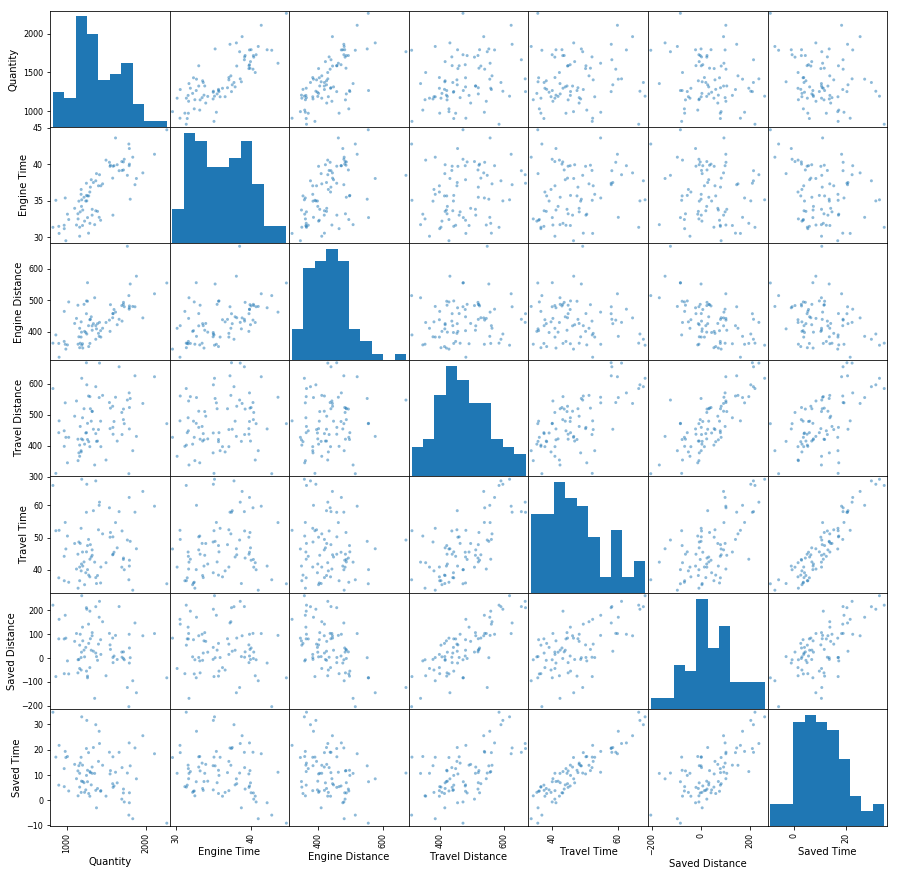

In [141]:
plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['axes.labelsize'] = 10

scatter_matrix(df_dategroup_filtered)
plt.show()

In [0]:
df_dategroup_filtered['Quantity/Engine Distance'] = df_dategroup_filtered['Quantity']/df_dategroup_filtered['Engine Distance']
df_dategroup_filtered['Quantity/Travel Distance'] = df_dategroup_filtered['Quantity']/df_dategroup_filtered['Travel Distance']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb37b23cb38>,
      dtype=object)

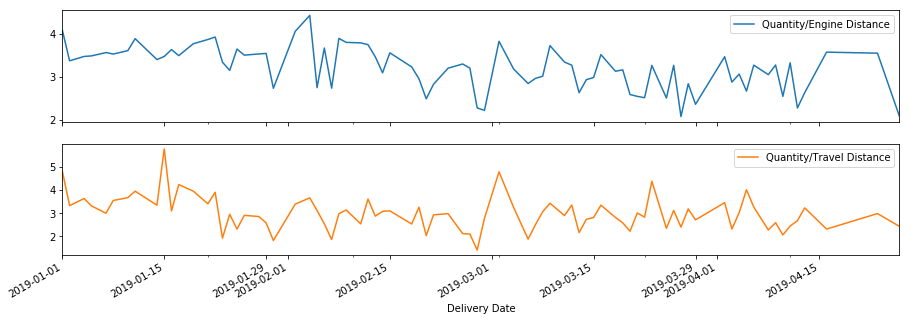

In [143]:
df_dategroup_filtered.plot(y=['Quantity/Engine Distance', 'Quantity/Travel Distance'], subplots=True, figsize=(15, 5))

In [144]:
df_dategroup_filtered.corr()

,Quantity,Engine Time,Engine Distance,Travel Distance,Travel Time,Saved Distance,Saved Time,Quantity/Engine Distance,Quantity/Travel Distance
Quantity,1.000000,0.784597,0.637542,0.250573,0.062418,-0.195918,-0.252181,0.764553,0.701494
Engine Time,0.784597,1.000000,0.486695,0.167887,0.135162,-0.169336,-0.267335,0.600054,0.599244
Engine Distance,0.637542,0.486695,1.000000,0.113946,-0.115609,-0.543163,-0.306519,0.001465,0.476670
Travel Distance,0.250573,0.167887,0.113946,1.000000,0.652611,0.772267,0.567731,0.233310,-0.484229
Travel Time,0.062418,0.135162,-0.115609,0.652611,1.000000,0.625469,0.918628,0.173222,-0.384664
Saved Distance,-0.195918,-0.169336,-0.543163,0.772267,0.625469,1.000000,0.675815,0.196241,-0.714050
Saved Time,-0.252181,-0.267335,-0.306519,0.567731,0.918628,0.675815,1.000000,-0.070829,-0.613066
Quantity/Engine Distance,0.764553,0.600054,0.001465,0.233310,0.173222,0.196241,-0.070829,1.000000,0.508341
Quantity/Travel Distance,0.701494,0.599244,0.476670,-0.484229,-0.384664,-0.714050,-0.613066,0.508341,1.000000


In [145]:
df_dategroup_filtered[df_dategroup_filtered['Saved Distance'] > 0].count()['Saved Distance']/df_dategroup_filtered.count()['Saved Distance']

0.675

In [146]:
df_dategroup_filtered[df_dategroup_filtered['Saved Time'] > 0].count()['Saved Time']/df_dategroup_filtered.count()['Saved Time']

0.925

In [147]:
df_dategroup_filtered[(df_dategroup_filtered['Saved Distance'] > 0) & (df_dategroup_filtered['Saved Time'] > 0)].count()['Saved Time']/df_dategroup_filtered.count()['Saved Time']

0.6625

In [148]:
df_dategroup_filtered[df_dategroup_filtered['Quantity/Engine Distance'] > df_dategroup_filtered['Quantity/Travel Distance']].count()['Quantity/Travel Distance']/df_dategroup_filtered.count()['Quantity/Travel Distance']

0.675

In [0]:
df_dategroup_filtered.to_csv(root_path+'Merged_Data/KPI.csv', index=True)

### <font color=magenta>【GPS Data】Statistical Tests</font>

In [0]:
df_dategroup_filtered.reset_index(inplace=True)
df_dategroup_filtered['Delivery Date'] = pd.to_datetime(df_dategroup_filtered['Delivery Date'])

In [151]:
df_dategroup_filtered.describe()

,Quantity,Engine Time,Engine Distance,Travel Distance,Travel Time,Saved Distance,Saved Time,Quantity/Engine Distance,Quantity/Travel Distance
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,1392.487500,36.079583,434.014288,475.437500,46.998816,41.423213,10.919233,3.208286,2.989216
std,300.487915,3.590400,62.369294,82.428925,8.756029,97.533856,9.003370,0.505877,0.728088
min,827.000000,29.533333,318.334000,310.000000,33.606111,-204.129000,-9.113889,2.077037,1.416096
25%,1186.000000,33.033333,387.995000,418.000000,40.628194,-10.652750,4.316458,2.841560,2.526697
50%,1329.500000,35.700000,428.863500,466.500000,45.458889,32.477500,10.645972,3.268227,2.978243
75%,1601.750000,39.125000,478.637250,536.500000,52.073681,99.086250,17.012639,3.548534,3.341552
max,2262.000000,44.716667,670.913000,667.000000,68.163056,260.533000,34.861944,4.422083,5.754839


In [152]:
# Shapiro-Wilk Test
num_months = len(df_dategroup_filtered['Delivery Date'].dt.month.unique())
for i in range(1, num_months+1):
    stat, p = stats.shapiro(df_dategroup_filtered[df_dategroup_filtered['Delivery Date'].dt.month == i]['Quantity'])
    print('Month {}:'.format(i))
    print('Statistics={:.3f}, p={:.3f}'.format(stat, p))
    alpha = 0.05
    if p > alpha:
        print('Sample follows normal distribution (fail to reject H0)')
    else:
        print('Sample does not follow normal distribution (reject H0)')

Month 1:
Statistics=0.948, p=0.289
Sample follows normal distribution (fail to reject H0)
Month 2:
Statistics=0.957, p=0.459
Sample follows normal distribution (fail to reject H0)
Month 3:
Statistics=0.872, p=0.007
Sample does not follow normal distribution (reject H0)
Month 4:
Statistics=0.931, p=0.312
Sample follows normal distribution (fail to reject H0)


In [0]:
qty_Jan = df_dategroup_filtered[df_dategroup_filtered['Delivery Date'].dt.month == 1]['Quantity']
qty_Feb = df_dategroup_filtered[df_dategroup_filtered['Delivery Date'].dt.month == 2]['Quantity']
qty_Mar = df_dategroup_filtered[df_dategroup_filtered['Delivery Date'].dt.month == 3]['Quantity']
qty_Apr = df_dategroup_filtered[df_dategroup_filtered['Delivery Date'].dt.month == 4]['Quantity']

In [154]:
# Bartlett’s test
stat, p = stats.bartlett(qty_Jan, qty_Feb, qty_Mar, qty_Apr)
print('Statistics={:.3f}, p={:.3f}'.format(stat, p))
alpha = 0.05
if p > alpha:
    print('All samples are from populations with equal variances (fail to reject H0)')
else:
    print('Not all samples are from populations with equal variances (reject H0)')

Statistics=3.160, p=0.368
All samples are from populations with equal variances (fail to reject H0)


In [155]:
# one-way ANOVA
stat, p = stats.f_oneway(qty_Jan, qty_Feb, qty_Mar, qty_Apr)
print('Statistics={:.3f}, p={:.3f}'.format(stat, p))
alpha = 0.05
if p > alpha:
    print('The means of all samples are equal (fail to reject H0)')
else:
    print('The means of all samples are unequal (reject H0)')

Statistics=3.589, p=0.017
The means of all samples are unequal (reject H0)


In [156]:
# student's t-test
stat, p = stats.ttest_ind(qty_Jan, qty_Feb)
print('Statistics={:.3f}, p={:.3f}'.format(stat, p))
alpha = 0.05
if p > alpha:
    print('The means of the two samples are equal (fail to reject H0)')
else:
    print('The means of the two samples are unequal (reject H0)')

Statistics=2.022, p=0.050
The means of the two samples are unequal (reject H0)


In [157]:
stat, p = stats.ttest_ind(qty_Jan, qty_Apr)
print('Statistics={:.3f}, p={:.3f}'.format(stat, p))
alpha = 0.05
if p > alpha:
    print('The means of the two samples are equal (fail to reject H0)')
else:
    print('The means of the two samples are unequal (reject H0)')

Statistics=2.641, p=0.012
The means of the two samples are unequal (reject H0)


In [158]:
stat, p = stats.ttest_ind(qty_Feb, qty_Apr)
print('Statistics={:.3f}, p={:.3f}'.format(stat, p))
alpha = 0.05
if p > alpha:
    print('The means of the two samples are equal (fail to reject H0)')
else:
    print('The means of the two samples are unequal (reject H0)')

Statistics=0.361, p=0.720
The means of the two samples are equal (fail to reject H0)


### <font color=magenta>【GPS Data】Count Trips</font>

In [0]:
# merge df_plans_trip_summary and df_GPS_trip_summary
df_plans_trip_summary = df_plans_trip_summary.reset_index()
df_GPS_trip_summary = df_GPS_trip_summary.reset_index()
df_GPS_trip_summary = df_GPS_trip_summary.rename(columns={'Date Only': 'Delivery Date'})

df_trip_count = df_plans_trip_summary.merge(df_GPS_trip_summary, how='left', suffixes=(' Engine', ' GPS'), 
                                            left_on=['Delivery Date', 'Vehicle ID'], right_on=['Delivery Date', 'Vehicle ID'])
df_trip_count = df_trip_count.merge(df_plans_quantity_vehicle, how='left', 
                                    left_on=['Delivery Date', 'Vehicle ID'], right_on=['Delivery Date', 'Vehicle ID'])

df_trip_count['Quantity/Engine Trip Count'] = df_trip_count['Quantity'] / df_trip_count['Trip Marker Engine']
df_trip_count['Quantity/Actual Trip Count'] = df_trip_count['Quantity'] / df_trip_count['Trip Marker GPS']

df_trip_count.replace({np.inf: np.NaN, -np.inf: np.NaN}, inplace=True)

df_trip_count.to_csv(root_path+'Merged_Data/TripCount.csv', index=False)